In [1]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели

%matplotlib inline

In [8]:
data = pd.read_csv('https://lms.skillfactory.ru/assets/courseware/v1/6a019aae7e83a8a11bb1fdf0788e3e6e/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/task_data.zip').drop(columns=('SNo'))
data.head()

,X_1,X_2,y
0,-0.869144,0.389310,0.0
1,-0.993467,-0.610591,0.0
2,-0.834064,0.239236,0.0
3,-0.136471,0.632003,1.0
4,0.403887,0.310784,1.0


<AxesSubplot: >

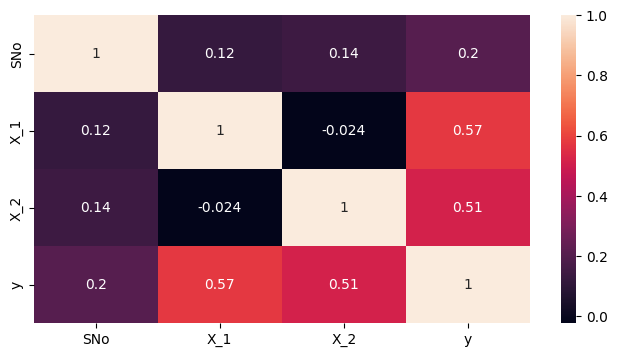

In [3]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(data.corr(), annot=True)

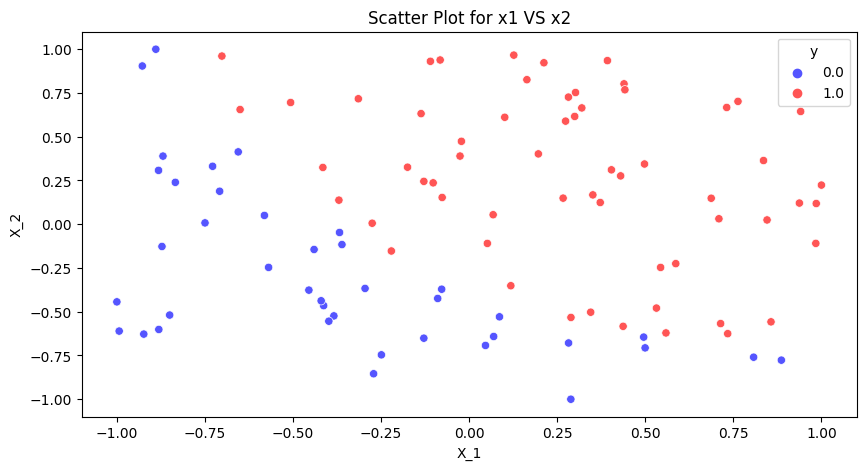

In [9]:
fig, ax = plt.subplots(figsize = (10, 5)) #фигура + координатная плоскость
#Строим диаграмму рассеяния
sns.scatterplot(
    data=data, #датасет
    x='X_1', #ось абсцисс
    y='X_2', #ось ординат
    hue='y', #группировка
    palette='seismic', #палитра
    ax=ax, #координатная плоскость
);

#Задаём название графику
ax.set_title('Scatter Plot for x1 VS x2');

In [10]:
# матрица наблюдений и столбец с ответами
X = data[['X_1', 'X_2']]
y = data['y']

In [11]:
from sklearn import linear_model #линейные модели

In [20]:
# создаем объект класса
sdg_2d = linear_model.LogisticRegression(random_state=42)
sdg_2d.fit(X, y)

LogisticRegression(random_state=42)

In [21]:
y_sdg_predict = sdg_2d.predict(X)

In [14]:
#Функция для визуализации модели
def plot_probabilities_2d(X, y, model):
    #Генерируем координатную сетку из всех возможных значений для признаков
    #Glucose изменяется от x1_min = 44 до x2_max = 199, 
    #BMI — от x2_min = 18.2 до x2_max = 67.1
    #Результат работы функции — два массива xx1 и xx2, которые образуют координатную сетку
    xx1, xx2 = np.meshgrid(
        np.arange(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, 0.1),
        np.arange(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, 0.1)
    )
    #Вытягиваем каждый из массивов в вектор-столбец — reshape(-1, 1)
    #Объединяем два столбца в таблицу с помощью hstack
    X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    #Предсказываем вероятность для всех точек на координатной сетке
    #Нам нужна только вероятность класса 1
    probs = model.predict_proba(X_net)[:, 1]
    #Переводим столбец из вероятностей в размер координатной сетки
    probs = probs.reshape(xx1.shape)
    #Создаём фигуру и координатную плоскость
    fig, ax = plt.subplots(figsize = (10, 5))
    #Рисуем тепловую карту вероятностей
    contour = ax.contourf(xx1, xx2, probs, 100, cmap='bwr')
    #Рисуем разделяющую плоскость — линию, где вероятность равна 0.5
    bound = ax.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black');
    #Добавляем цветовую панель 
    colorbar = fig.colorbar(contour)
    #Накладываем поверх тепловой карты диаграмму рассеяния
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y, palette='seismic', ax=ax)
    #Даём графику название
    ax.set_title('Scatter Plot with Decision Boundary');
    #Смещаем легенду в верхний левый угол вне графика
    ax.legend(bbox_to_anchor=(-0.05, 1))

d:\Users\dolzh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


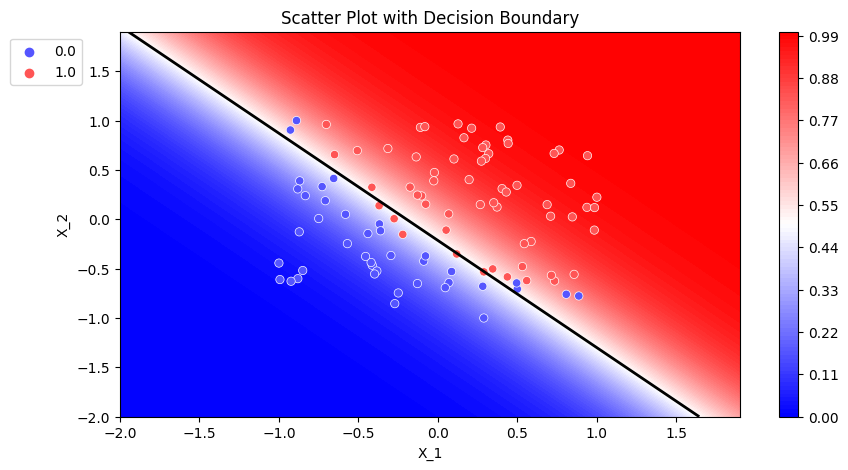

In [22]:
plot_probabilities_2d(X, y, sdg_2d)

Задание 3.6
У вас есть истинные ответы  
y_true = [0, 0, 1, 1, 1, 1, 0, 1]  
и предсказанные ответы  
y_pred = [0, 1, 0, 0, 1, 1, 0, 1].  
Вычислите значение метрики precision.

In [1]:
from sklearn import metrics

In [3]:
y_true = [0, 0, 1, 1, 1, 1, 0, 1]
y_pred = [0, 1, 0, 0, 1, 1, 0, 1]
print(metrics.precision_score(y_true, y_pred))

0.75


[0, 0, 1, 1, 1, 1, 0, 1]  
[0, 1, 0, 0, 1, 1, 0, 1]  
    |        |  |     |

3 / (3 + 1)
Какая доля положительно предсказанных ответов на самом деле является положительными

Задание 3.7
У вас есть истинные ответы  
y_true = [0, 0, 1, 1, 1, 1, 0, 1]  
и предсказанные ответы  
y_pred = [0, 1, 0, 0, 1, 1, 0, 1].

Вычислите значение метрики recall.

In [6]:
y_true = [0, 0, 1, 1, 1, 1, 0, 1]
y_pred = [0, 1, 0, 0, 1, 1, 0, 1]
print(3/(3+2))
print(metrics.recall_score(y_true, y_pred))

0.6
0.6


Какая доля объектов среди положительных верно определена моделью

Задание 3.8

У вас есть истинные ответы y_true = [0, 0, 1, 1, 1, 1, 0, 1] и предсказанные ответы y_pred = [0, 1, 0, 0, 1, 1, 0, 1].

Вычислите значение метрики .

In [8]:
y_true = [0, 0, 1, 1, 1, 1, 0, 1]
y_pred = [0, 1, 0, 0, 1, 1, 0, 1]
print(metrics.f1_score(y_true, y_pred))
print(2 * 0.6 * 0.75 / (0.6 + 0.75))

0.6666666666666665
0.6666666666666665


## Задание 5.10
Обучите дерево решений с максимальной глубиной 6 и критерием информативности Джини. В качестве значения параметра random_state возьмите число 42.

In [7]:
#импорт библиотек
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации
from sklearn import tree #модели деревьев решения
from sklearn import metrics #метрики

In [4]:
diabetes_data = pd.read_csv('https://lms.skillfactory.ru/assets/courseware/v1/c21dd892cc0cc4fba3976b2a91559ff0/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/diabetes_cleaned.zip')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,35.7,0.148,21,0
2,2,108.0,64.0,29.0,30.8,0.158,21,0
3,8,107.0,80.0,29.0,24.6,0.856,34,0
4,7,136.0,90.0,29.0,29.9,0.210,50,0


In [6]:
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

In [9]:
dt_clf_full = tree.DecisionTreeClassifier(
    criterion='gini',
    max_depth=6,
    random_state=42
)
dt_clf_full.fit(X.values, y.values)
y_pred = dt_clf_full.predict(X.values)
print(metrics.classification_report(y, y_pred))
print(metrics.f1_score(y, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90       493
           1       0.85      0.73      0.78       264

    accuracy                           0.86       757
   macro avg       0.85      0.83      0.84       757
weighted avg       0.86      0.86      0.86       757

0.7820773930753563


## Задание 6.5
(random forest)

In [6]:
#импорт библиотек
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации
# from sklearn import tree #модели деревьев решения
from sklearn import metrics #метрики
from sklearn import ensemble
from sklearn.model_selection import train_test_split

In [4]:
wine_data = pd.read_csv('https://lms.skillfactory.ru/assets/courseware/v1/4df69b20d6ac3198d37f55cbd964c1ab/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/winequality-red.zip', sep=';')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Для начала подготовим данные к бинарной классификации. Условно разделим вино на хорошее и плохое. Хорошим вином будем называть вино, параметр quality которого  6, плохим — всё остальное.

In [5]:
wine_data['quality'] = wine_data['quality'].apply(lambda x: 1 if x>=6 else 0)
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
#Создаём объект класса RandomForestClassifier
rf_clf_train = ensemble.RandomForestClassifier(
    n_estimators=500, #число деревьев
    criterion='gini', #критерий эффективности
    max_depth=8, #максимальная глубина дерева
    max_features='sqrt', #число признаков из метода случайных подпространств
    min_samples_leaf = 10,
    random_state=42 #генератор случайных чисел
)
#Обучаем модель 
rf_clf_train.fit(X_train, y_train)

y_train_predict = rf_clf_train.predict(X_train)
print(f'Train accuracy {metrics.accuracy_score(y_train, y_train_predict)}')
y_test_predict = rf_clf_train.predict(X_test)
print(f'Test accuracy {metrics.accuracy_score(y_test, y_test_predict)}')

Train accuracy 0.8459734167318217
Test accuracy 0.75
